## Mission 2. Abengers, Assemble!
Bicsubi를 다 만들고 보니 사이렌이 울렸다. 국제보안기구 <U.B.U.N.T.U>에게서 긴급 이메일이 도착했다. 죄없는 컴퓨터들에게 무차별적인 Request를 통해 이상상태로 만드는 악당 <디도스>가 인터넷을 침략하려고 한다는 소식을 전했다. 이를 막기 위해 최정예부대인 우리는 Abengers (저작권을 조심합시다) 를 소집하기로 했다. 도와줘요 Abengers!  


이 미션은 다음 데이터셋을 이용해서 진행합니다.  
https://www.kaggle.com/dannielr/marvel-superheroes?select=charcters_stats.csv  
제출할 파일 : abengers.ipynb  

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

무려 8개의 .csv 와 .xlsx 파일로 구성된 데이터셋입니다.
먼저 데이터셋부터 데이터 프레임으로 변환하고, 어떤 변수들이 있는지 살펴보도록 하겠습니다.


In [187]:
characters =pd.read_csv('characters.csv')
characters

,characterID,name
0,1009220,Captain America
1,1010740,Winter Soldier
2,1009471,Nick Fury
3,1009552,S.H.I.E.L.D.
4,1009228,Sharon Carter
...,...,...
1165,1011395,Talon (Fraternity of Raptors)
1166,1011196,Captain Flint
1167,1009397,Lava-Man
1168,1011113,Blue Blade


In [188]:
chtoComics =pd.read_csv('charactersToComics.csv')
chtoComics

,comicID,characterID
0,16232,1009220
1,16232,1010740
2,16248,1009220
3,16248,1009471
4,16248,1009552
...,...,...
75252,45951,1009337
75253,45951,1011428
75254,45951,1011086
75255,45951,1009546


In [189]:
ch_stats =pd.read_csv('charcters_stats.csv')
ch_stats

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436
...,...,...,...,...,...,...,...,...,...
606,Yellowjacket,good,88,10,12,28,12,14,164
607,Yellowjacket II,good,50,10,35,28,31,28,182
608,Ymir,good,50,100,27,100,83,28,388
609,Zatanna,good,75,10,23,28,100,56,292


In [190]:
comics =pd.read_csv('comics.csv')
comics

,comicID,title,issueNumber,description
0,16232,Cap Transport (2005) #12,12.0,NaN
1,16248,Cap Transport (2005) #9,9.0,NaN
2,4990,Halo Preview (2006),0.0,NaN
3,21486,Ultimate X-Men (Spanish Language Edition) (200...,9.0,NaN
4,58634,A Year of Marvels: The Incredible (2016) #5,5.0,It’s Halloween in the Marvel U! What does that...
...,...,...,...,...
41222,47542,Kick-Ass 3 (2013) #1 (Ferry Variant),1.0,Kick-Ass and Hit-Girl&rsquo;s blockbuster retu...
41223,46766,X-Factor (2005) #257,257.0,<ul><li>The end begins here.</li><li>THE END O...
41224,45951,Cable and X-Force (2012) #9,9.0,Guest starring the Uncanny Avengers!\n- Hope g...
41225,46750,Wolverine: Sabretooth Reborn (Hardcover),0.0,Superstars Jeph Loeb and Simone Bianchi's tita...


In [191]:
marvel_ch_info =pd.read_csv('marvel_characters_info.csv')
marvel_ch_info

,ID,Name,Alignment,Gender,EyeColor,Race,HairColor,Publisher,SkinColor,Height,Weight
0,0,A-Bomb,good,Male,yellow,Human,No Hair,Marvel Comics,-,203.0,441.0
1,1,Abe Sapien,good,Male,blue,Icthyo Sapien,No Hair,Dark Horse Comics,blue,191.0,65.0
2,2,Abin Sur,good,Male,blue,Ungaran,No Hair,DC Comics,red,185.0,90.0
3,3,Abomination,bad,Male,green,Human / Radiation,No Hair,Marvel Comics,-,203.0,441.0
4,4,Abraxas,bad,Male,blue,Cosmic Entity,Black,Marvel Comics,-,-99.0,-99.0
...,...,...,...,...,...,...,...,...,...,...,...
729,729,Yellowjacket II,good,Female,blue,Human,Strawberry Blond,Marvel Comics,-,165.0,52.0
730,730,Ymir,good,Male,white,Frost Giant,No Hair,Marvel Comics,white,304.8,-99.0
731,731,Yoda,good,Male,brown,Yoda's species,White,George Lucas,green,66.0,17.0
732,732,Zatanna,good,Female,blue,Human,Black,DC Comics,-,170.0,57.0


In [192]:
marvel_dc_chracters =pd.read_excel('marvel_dc_characters.xlsx')
marvel_dc_chracters

,ID,Name,Identity,Alignment,EyeColor,HairColor,Gender,Status,Appearances,FirstAppearance,Year,Universe
0,100001,Claude Potier (Earth-616),Secret,Neutral,Hazel,Brown,Male,Living,2.0,2000-10-01 00:00:00,2000.0,DC
1,100002,Elektra Natchios (Earth-616),Secret,Neutral,Blue,Black,Female,Living,280.0,1981-01-01 00:00:00,1981.0,Marvel
2,100003,Thomas Williams (Earth-616),Secret,Neutral,Black,NaN,Male,Living,1.0,2002-08-01 00:00:00,2002.0,DC
3,100004,Mogul (Earth-616),NaN,NaN,NaN,Bald,NaN,Living,NaN,1970-05-01 00:00:00,1970.0,DC
4,100005,Denise Havens (Earth-616),Secret,Good,Brown,Black,Female,Living,4.0,1995-01-01 00:00:00,1995.0,DC
...,...,...,...,...,...,...,...,...,...,...,...,...
39643,139644,Ivan Petrovsky (Earth-616),Public,Bad,NaN,Black,Male,Living,2.0,1961-02-01 00:00:00,1961.0,Marvel
39644,139645,Tom\u00e1s Ram\u00edrez (Earth-616),NaN,Bad,Brown,Bald,Male,Living,9.0,1982-09-01 00:00:00,1982.0,DC
39645,139646,Benjamin Krullen (New Earth),Secret,Bad,NaN,NaN,Male,Deceased,29.0,"1988, July",1988.0,DC
39646,139647,Mercenary (Human Fly Foe) (Earth-616),Secret,Bad,NaN,NaN,Male,Living,1.0,1977-09-01 00:00:00,1977.0,Marvel


In [193]:
power_matrix =pd.read_csv('superheroes_power_matrix.csv')
power_matrix

,Name,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,Yellowjacket II,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
663,Ymir,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
664,Yoda,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
665,Zatanna,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Core Mission
다음 질문에 답하시오.

캐릭터는 저마다 지능, 힘, ... 등 다양한 수치를 지니고 있다. 이러한 수치의 합이 가장 큰 캐릭터는 누구인가? 이를 보이기 위한 과정을 보여라.\
좋은 캐릭터와 나쁜 캐릭터의 능력치들의 수치 분포를 알고 싶다. 이를 표현하기 위한 적절한 그래프를 선택해서 이를 위한 전처리를 진행하고, 시각화하여라.

#### 첫 번째 질문: '캐릭터는 저마다 지능, 힘, ... 등 다양한 수치를 지니고 있다. 이러한 수치의 합이 가장 큰 캐릭터는 누구인가?'
캐릭터의 다양한 능력과 그 수치를 보여주는 dataset은 'charcters_stats.csv'를 불러온 ch_stats에서 알 수 있습니다.   
먼저 ch_stats가 어떻게 구성되어 있는지 대략적으로 살펴보도록 하겠습니다.

In [194]:
ch_stats

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436
...,...,...,...,...,...,...,...,...,...
606,Yellowjacket,good,88,10,12,28,12,14,164
607,Yellowjacket II,good,50,10,35,28,31,28,182
608,Ymir,good,50,100,27,100,83,28,388
609,Zatanna,good,75,10,23,28,100,56,292


'Name' 변수에 캐릭터의 이름이 있고, 'Alignment' 변수가 좋은 편인지, 나쁜 편인지에 대한 정보를 담고 있고, 'Intellgigence'부터 'Combat'까지가 다양한 능력 분야의 수치 정보를 담고 있으며 마지막 'Total'변수는 각 능력치의 합을 담고 있는 것으로 보입니다.  

In [195]:
ch_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          611 non-null    object
 1   Alignment     608 non-null    object
 2   Intelligence  611 non-null    int64 
 3   Strength      611 non-null    int64 
 4   Speed         611 non-null    int64 
 5   Durability    611 non-null    int64 
 6   Power         611 non-null    int64 
 7   Combat        611 non-null    int64 
 8   Total         611 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 43.1+ KB


'Alignment'변수에서 3개의 결측치가 있습니다.

In [196]:
ch_stats.describe()

,Intelligence,Strength,Speed,Durability,Power,Combat,Total
count,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000
mean,44.502455,29.083470,27.306056,41.839607,40.312602,43.206219,226.250409
std,32.924722,32.610939,25.760173,36.543849,34.539910,33.270329,167.324034
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5.000000
25%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5.000000
50%,50.000000,10.000000,23.000000,32.000000,37.000000,50.000000,255.000000
75%,75.000000,53.000000,42.000000,80.000000,67.000000,70.000000,351.500000
max,113.000000,100.000000,100.000000,120.000000,100.000000,101.000000,581.000000


'Total' 변수가 다른 intelligence부터 combat컬럼까지의 합이  맞는지 확인해 보겠습니다.

In [197]:
ch_stats['IsTotalSame'] =  ch_stats['Total']== ch_stats.iloc[:,2:-1].sum(axis=1)

In [198]:
ch_stats['IsTotalSame'].value_counts()

True    611
Name: IsTotalSame, dtype: int64

'Total'feature와 각 수치를 더한 값이 모두 일치합니다.  
그렇다면, 'Total'의 value가 가장 큰 row의 네임을 찾으면 되겠네요.  

In [199]:
ch_stats.drop(['IsTotalSame'], axis=1, inplace=True)

In [200]:
ch_stats.sort_values(by='Total', axis = 0, ascending=False)


,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
361,Martian Manhunter,good,100,100,96,100,100,85,581
242,General Zod,bad,94,100,96,100,94,95,579
535,Superboy-Prime,bad,94,100,100,100,100,85,579
537,Superman,good,100,100,100,100,94,85,579
16,Amazo,bad,75,100,100,100,100,100,575
...,...,...,...,...,...,...,...,...,...
462,Renata Soliz,good,1,1,1,1,0,1,5
137,Captain Mar-vell,good,1,1,1,1,0,1,5
136,Captain Epic,good,1,1,1,1,0,1,5
466,Ripcord,good,1,1,1,1,0,1,5


In [201]:
print(f"능력치의 합이 가장 큰 캐릭터는 {ch_stats.sort_values(by='Total', axis = 0, ascending=False).iloc[0,0]}입니다.")

능력치의 합이 가장 큰 캐릭터는 Martian Manhunter입니다.


#### 두 번째 질문: 좋은 캐릭터와 나쁜 캐릭터의 능력치들의 수치 분포를 알고 싶다. 이를 표현하기 위한 적절한 그래프를 선택해서 이를 위한 전처리를 진행하고, 시각화하여라.

다행히도 좋은 캐릭터 / 나쁜 캐릭터인지 구분하는 column도 같은 dataFrame에 있으므로 ch_stats만을 바탕으로 분석할 수 있을 것 같습니다.  
먼저 'Alignment' feature에 결측치를 처리하겠습니다.

In [231]:
ch_stats[ch_stats['Alignment'].isna()]

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
28,Anti-Venom,NaN,75,60,65,90,85,84,459
98,Blackwulf,NaN,50,28,8,30,59,25,200
560,Trickster,NaN,1,1,1,1,0,1,5


In [248]:
ch_stats_a = ch_stats.query("Name in ['Anti-Venom', 'Blackwulf','Trickster']")
ch_stats_a

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
28,Anti-Venom,NaN,75,60,65,90,85,84,459
98,Blackwulf,NaN,50,28,8,30,59,25,200
560,Trickster,NaN,1,1,1,1,0,1,5


Alignment 정보가 들어가 있는 다른 데이터셋에 정보가 없는지 찾아보겠습니다.

In [250]:
marvel_ch_info_a =marvel_ch_info.query("Name in ['Anti-Venom', 'Blackwulf','Trickster']")
marvel_ch_info_a 

,ID,Name,Alignment,Gender,EyeColor,Race,HairColor,Publisher,SkinColor,Height,Weight
33,33,Anti-Venom,-,Male,blue,Symbiote,Blond,Marvel Comics,-,229.0,358.0
110,110,Blackwulf,-,Male,red,Alien,White,Marvel Comics,-,188.0,88.0
676,676,Trickster,-,Male,blue,Human,Blond,DC Comics,-,183.0,81.0


marvel_ch_info 데이터프레임은 Alignment 정보가 없습니다.

In [253]:
marvel_dc_chracters['Name']

0                    Claude Potier (Earth-616)
1                 Elektra Natchios (Earth-616)
2                  Thomas Williams (Earth-616)
3                            Mogul (Earth-616)
4                    Denise Havens (Earth-616)
                         ...                  
39643               Ivan Petrovsky (Earth-616)
39644      Tom\u00e1s Ram\u00edrez (Earth-616)
39645             Benjamin Krullen (New Earth)
39646    Mercenary (Human Fly Foe) (Earth-616)
39647               Brute Benhurst (Earth-616)
Name: Name, Length: 39648, dtype: object

marvel_dc_chracters 데이터프레임은 뒤에 주렁주렁 달린 것들을 지우고 봐야할 것 같습니다.

In [254]:
import re
regex = "\(.*\)|\s-\s.*"

In [271]:
marvel_dc_chracters['Name'] = marvel_dc_chracters['Name'].apply(lambda x: re.sub(regex, '', x).strip() )
marvel_dc_chracters['Name'] 

0                  Claude Potier
1               Elektra Natchios
2                Thomas Williams
3                          Mogul
4                  Denise Havens
                  ...           
39643             Ivan Petrovsky
39644    Tom\u00e1s Ram\u00edrez
39645           Benjamin Krullen
39646                  Mercenary
39647             Brute Benhurst
Name: Name, Length: 39648, dtype: object

In [274]:
marvel_dc_chracters_a =marvel_dc_chracters.query("Name in ['Anti-Venom', 'Blackwulf','Trickster']")
marvel_dc_chracters_a

,ID,Name,Identity,Alignment,EyeColor,HairColor,Gender,Status,Appearances,FirstAppearance,Year,Universe
11644,111645,Blackwulf,Secret,Neutral,Red,White,Male,Living,15.0,1994-03-01 00:00:00,1994.0,DC
14073,114074,Anti-Venom,NaN,Good,Red,No,Agender,Deceased,19.0,2008-10-01 00:00:00,2008.0,DC
19076,119077,Blackwulf,Secret,Neutral,Red,White,Male,Living,15.0,1994-03-01 00:00:00,1994.0,Marvel
37063,137064,Anti-Venom,NaN,Good,Red,No,Agender,Deceased,19.0,2008-10-01 00:00:00,2008.0,Marvel


'Anti-Venom'은 good, 'Blackwulf'는 neutral, 'Trickster'는 여기도 없으므로 drop하겠습니다.



In [286]:
ch_stats[ch_stats["Name"]=="Blackwulf"].loc[:,"Alignment"]


98    NaN
Name: Alignment, dtype: object

In [293]:
ch_stats.loc[ch_stats["Name"]=="Blackwulf","Alignment"] = "neutral"
ch_stats.loc[ch_stats["Name"]=="Blackwulf"]

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
98,Blackwulf,neutral,50,28,8,30,59,25,200


In [294]:
ch_stats.loc[ch_stats["Name"]=="Anti-Venom","Alignment"] = "good"
ch_stats.loc[ch_stats["Name"]=="Anti-Venom"]

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
28,Anti-Venom,good,75,60,65,90,85,84,459


In [304]:
ch_stats = ch_stats[ch_stats["Name"]!="Trickster"]

In [305]:
ch_stats.info(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 610 entries, 0 to 610
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          610 non-null    object
 1   Alignment     610 non-null    object
 2   Intelligence  610 non-null    int64 
 3   Strength      610 non-null    int64 
 4   Speed         610 non-null    int64 
 5   Durability    610 non-null    int64 
 6   Power         610 non-null    int64 
 7   Combat        610 non-null    int64 
 8   Total         610 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 47.7+ KB


이제 Alignment 결측치를 모두 처리하였습니다.

각 능력 수치별 변수의 분포와 변수별 관계, 그리고 여기에 좋은 편, 나쁜 편 사이의 차이가 있는지 대략적으로 보고 싶어 pairplot을 그려보았습니다.

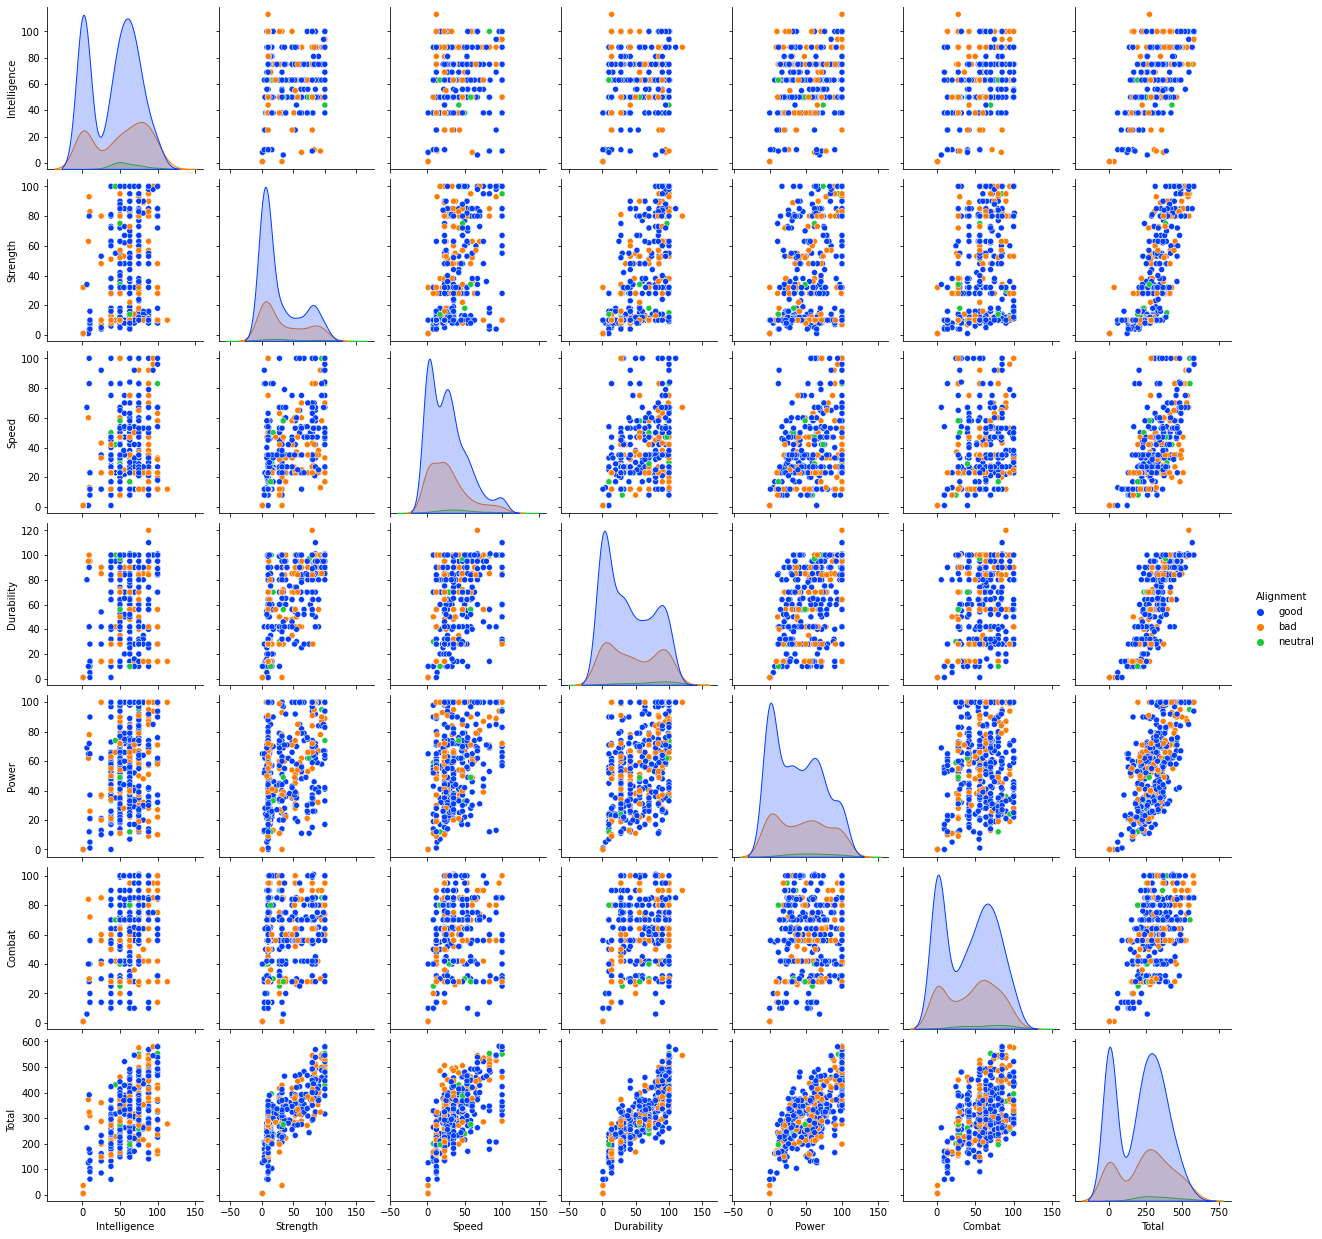

In [306]:
sns.pairplot(ch_stats,
            diag_kind='kde',
            hue='Alignment',
            palette='bright')
plt.show()

good와 bad팀의 크기 차이가 커서 그런가 scatter plot 이나 kde plot 으로는 두 팀 간의 분포 차이 보다는 good팀의 빈도가 더 높다는 것이 두드러집니다.  
그룹의 크기 차이는 보여주지 않고, 분포의 차이(평균, 분산...)를 보여주는 boxplot을 그려보도록 하겠습니다.

In [307]:
stats = ch_stats.columns[2:9]
stats

Index(['Intelligence', 'Strength', 'Speed', 'Durability', 'Power', 'Combat',
       'Total'],
      dtype='object')

In [308]:
ch_stats.describe()

,Intelligence,Strength,Speed,Durability,Power,Combat,Total
count,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000
mean,44.573770,29.129508,27.349180,41.906557,40.378689,43.275410,226.613115
std,32.904479,32.617824,25.759231,36.536319,34.529574,33.253609,167.220790
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5.000000
25%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5.000000
50%,50.000000,10.000000,23.000000,32.000000,37.000000,50.000000,255.500000
75%,75.000000,53.000000,42.000000,80.000000,67.000000,70.000000,351.750000
max,113.000000,100.000000,100.000000,120.000000,100.000000,101.000000,581.000000


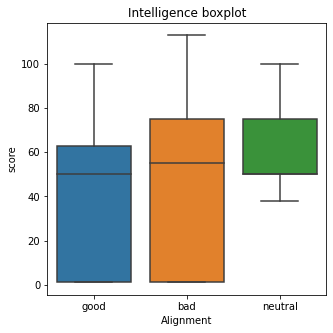

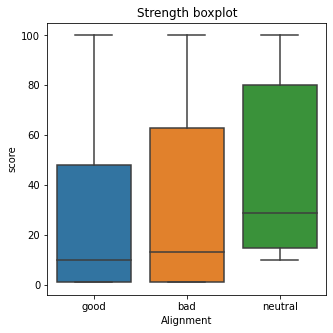

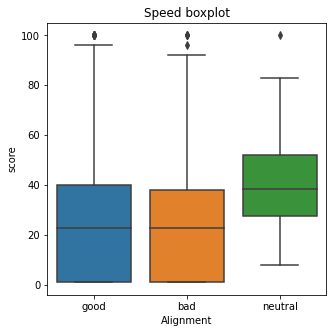

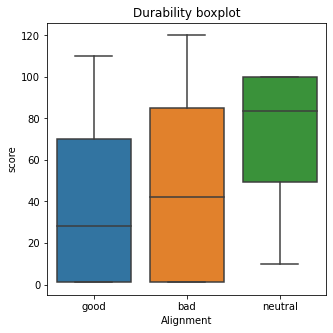

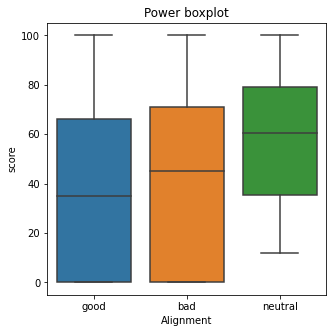

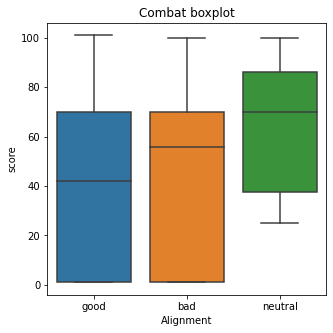

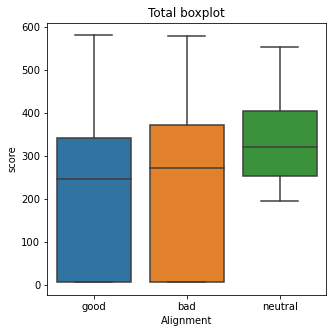

In [311]:
for stat in (stats):
    plt.figure(figsize=(5,5))
    sns.boxplot(x='Alignment', y=stat, data=ch_stats)
    plt.ylabel('score')
    plt.title(stat+" boxplot")    
    plt.show()

위의 boxplot을 보고 알 수 있는 것은 다음과 같습니다.
1. speed feature를 제외한, 모든 feature에서 bad 팀의 평균이 더 높았습니다.
2. neurtal 팀은 전 영역에서 bad, good 팀보다 높은 평균을 가지고 있습니다.
3. 그러나 good팀, bad팀 모두 speed를 제외한 전 영역에서 분산이 컸습니다. 히어로들의 능력치 차이가 큰 것 같습니다.
4. 전 영역, good팀, bad팀 모두 25% percentile이 0에 가깝습니다. 전체 수치를 모두 더한 total까지도요.\ 능력 수치가 낮은 히어로들도 상당하다는 것을 알 수 있습니다.  

### Extra Mission
다음 질문에 답하시오.  

캐릭터는 저마다 지능, 힘, ... 등 다양한 수치를 지니고 있다. 또한 각 캐릭터는 DC, 마블 등 다양한 코믹스 회사를 바탕으로 하고 있다. 어떤 코믹스 회사의 캐릭터들이 능력치 합의 평균이 가장 큰가? 이를 보이기 위한 과정을 보여라.\
좋은 캐릭터와 나쁜 캐릭터가 격돌한다고 한다. 격돌하는 경우 캐릭터들의 능력치의 합의 평균이 큰 팀이 이긴다고 한다. 단, 불의를 못참는 중립 캐릭터들은 중립캐릭터가 없었을 당시에 열세인 팀에 가담한다. 이러한 상황일때 결과적으로 어떤 캐릭터 진영이 승리할 것인가? 이를 보이기 위한 과정을 보여라.\
이 데이터를 이용해 진행하고 싶은 EDA 및 시각화가 있다면 자유롭게 진행하여라.\
이 과제는 핵심 임무 이후에 진행되어야 한다.

엑스트라 미션은 두 개의 질문으로 구성되어 있습니다.

#### 첫 번째 질문: 각 캐릭터는 DC, 마블 등 다양한 코믹스 회사를 바탕으로 하고 있다. 어떤 코믹스 회사의 캐릭터들이 능력치 합의 평균이 가장 큰가?

이 질문은 핵심 미션에서 캐릭터의 출신 회사에 대한 질문에 추가되어 있습니다. 이 데이터는 ch_stats 데이터프레임으로는 얻을 수 없습니다.  
marvel_ch_info의 publisher feature를 활용하려고 합니다.

In [341]:
ch_stats

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total,is_bad
0,3-D Man,good,50,31,43,32,25,52,233,False
1,A-Bomb,good,38,100,17,80,17,64,316,False
2,Abe Sapien,good,88,14,35,42,35,85,299,False
3,Abin Sur,good,50,90,53,64,84,65,406,False
4,Abomination,bad,63,80,53,90,55,95,436,True
...,...,...,...,...,...,...,...,...,...,...
606,Yellowjacket,good,88,10,12,28,12,14,164,False
607,Yellowjacket II,good,50,10,35,28,31,28,182,False
608,Ymir,good,50,100,27,100,83,28,388,False
609,Zatanna,good,75,10,23,28,100,56,292,False


In [342]:
marvel_ch_info

,ID,Name,Alignment,Gender,EyeColor,Race,HairColor,Publisher,SkinColor,Height,Weight
0,0,A-Bomb,good,Male,yellow,Human,No Hair,Marvel Comics,-,203.0,441.0
1,1,Abe Sapien,good,Male,blue,Icthyo Sapien,No Hair,Dark Horse Comics,blue,191.0,65.0
2,2,Abin Sur,good,Male,blue,Ungaran,No Hair,DC Comics,red,185.0,90.0
3,3,Abomination,bad,Male,green,Human / Radiation,No Hair,Marvel Comics,-,203.0,441.0
4,4,Abraxas,bad,Male,blue,Cosmic Entity,Black,Marvel Comics,-,-99.0,-99.0
...,...,...,...,...,...,...,...,...,...,...,...
729,729,Yellowjacket II,good,Female,blue,Human,Strawberry Blond,Marvel Comics,-,165.0,52.0
730,730,Ymir,good,Male,white,Frost Giant,No Hair,Marvel Comics,white,304.8,-99.0
731,731,Yoda,good,Male,brown,Yoda's species,White,George Lucas,green,66.0,17.0
732,732,Zatanna,good,Female,blue,Human,Black,DC Comics,-,170.0,57.0


In [323]:
marvel_ch_info[['Name','Publisher']]


,Name,Publisher
0,A-Bomb,Marvel Comics
1,Abe Sapien,Dark Horse Comics
2,Abin Sur,DC Comics
3,Abomination,Marvel Comics
4,Abraxas,Marvel Comics
...,...,...
729,Yellowjacket II,Marvel Comics
730,Ymir,Marvel Comics
731,Yoda,George Lucas
732,Zatanna,DC Comics


marvel_ch_info의 'Name','Publisher'만 골라서 'Name'을 기준으로 ch_stats 데이터프레임에 합치도록 하겠습니다.

In [324]:
merge_df = ch_stats.merge(marvel_ch_info[['Name','Publisher']], on=['Name'], how='inner')

In [325]:
merge_df

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total,Publisher
0,A-Bomb,good,38,100,17,80,17,64,316,Marvel Comics
1,Abe Sapien,good,88,14,35,42,35,85,299,Dark Horse Comics
2,Abin Sur,good,50,90,53,64,84,65,406,DC Comics
3,Abomination,bad,63,80,53,90,55,95,436,Marvel Comics
4,Abraxas,bad,88,100,83,99,100,56,526,Marvel Comics
...,...,...,...,...,...,...,...,...,...,...
594,Yellowjacket,good,88,10,12,28,12,14,164,Marvel Comics
595,Yellowjacket II,good,50,10,35,28,31,28,182,Marvel Comics
596,Ymir,good,50,100,27,100,83,28,388,Marvel Comics
597,Zatanna,good,75,10,23,28,100,56,292,DC Comics


'Publisher'에 결측치가 있는 히어로들이 누구인지 보도록 합니다.

In [327]:
merge_df[merge_df['Publisher'].isna()]

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total,Publisher
39,Astro Boy,good,1,1,1,1,0,1,5,NaN
152,Chuck Norris,good,50,80,47,56,42,99,374,NaN
176,Darkside,bad,1,1,1,1,0,1,5,NaN
224,Flash Gordon,good,1,1,1,1,0,1,5,NaN
296,Jack Bauer,good,1,1,1,1,0,1,5,NaN
322,Kool-Aid Man,good,25,10,12,14,10,14,85,NaN
533,The Cape,good,38,10,23,32,22,64,189,NaN


In [330]:
merge_df.Publisher.value_counts()

Marvel Comics        349
DC Comics            171
NBC - Heroes          19
Image Comics          13
Dark Horse Comics      8
HarperCollins          6
Team Epic TV           5
SyFy                   5
ABC Studios            4
Icon Comics            4
Shueisha               2
Wildstorm              2
Universal Studios      1
Hanna-Barbera          1
Sony Pictures          1
Microsoft              1
Name: Publisher, dtype: int64

이제 본격적으로 어떤 코믹스 회사의 캐릭터들이 능력치 합의 평균이 가장 큰 지 보겠습니다.

In [339]:
merge_df['Total'].groupby(merge_df['Publisher']).mean().sort_values(axis = 0, ascending=False)

Publisher
Shueisha             481.500000
Microsoft            425.000000
Sony Pictures        398.000000
DC Comics            254.888889
Marvel Comics        243.851003
Universal Studios    237.000000
Dark Horse Comics    196.875000
SyFy                 188.800000
ABC Studios          166.000000
Icon Comics          148.000000
NBC - Heroes         140.526316
Image Comics          70.615385
Wildstorm              5.000000
Team Epic TV           5.000000
HarperCollins          5.000000
Hanna-Barbera          5.000000
Name: Total, dtype: float64

In [343]:
mean_rank = merge_df['Total'].groupby(merge_df['Publisher']).mean().sort_values(axis = 0, ascending=False)

In [360]:
print(f"가장 평균 능력이 높은 회사는 {mean_rank.index[0]}로, {mean_rank[0]} 점입니다.")

가장 평균 능력이 높은 회사는 Shueisha로,481.5 점입니다.


#### 두 번째 질문: 좋은 캐릭터와 나쁜 캐릭터가 격돌한다고 한다. 격돌하는 경우 캐릭터들의 능력치의 합의 평균이 큰 팀이 이긴다고 한다.  
#### 단, 불의를 못참는 중립 캐릭터들은 중립캐릭터가 없었을 당시에 열세인 팀에 가담한다. 이러한 상황일때 결과적으로 어떤 캐릭터 진영이 승리할 것인가?

능력치 합 -> ch_stats['Total']\
능력치 합의 평균 -> ch_stats['Total'].mean()

In [331]:
ch_stats['Total'].mean()

226.61311475409835

캐릭터 전체의 능력치 합 평균은 226.26점 정도이다.\
good, bad, neutral 그룹의 평균은 각 얼마일까?

In [332]:
ch_stats['Total'].groupby(ch_stats['Alignment']).mean()

Alignment
bad        247.212121
good       215.554273
neutral    342.416667
Name: Total, dtype: float64

neutral 팀의 평균이 가장 높고, good과 bad 중에서는 bad 팀의 평균이 좀 더 높습니다.  
그렇다면 neutral과 good을 한 팀으로 묶어 새롭게 분류하는 변수를 만들어 보겠습니다.

In [333]:
ch_stats['is_bad'] = ch_stats['Alignment'] =='bad'

In [334]:
ch_stats['Total'].groupby(ch_stats['is_bad']).mean()

is_bad
False    218.975281
True     247.212121
Name: Total, dtype: float64

good과 neutral 연합팀의 평균은 218.5이고, bad 팀 평균은 247.21입니다. bad팀의 능력치 평균이 더 높습니다.